
#### OBJETIVO: A partir de los mapas (diarios, mensuales, anuales), se extraen los datos en los sitios(estciones de monitoreo) de interes segun el centro urbano

In [1]:
#Libreria
import os
import glob
import numpy as np
import pandas as pd
import rasterio
from rasterio.sample import sample_gen

from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import folium
print("Librerias ok")

Librerias ok


In [11]:
#Informacion de entrada
estacion = "CH"
modelo = "01-RF-CV-M1-170625-CH/2024"

base_dir = f"D:/Josefina/Proyectos/ProyectoChile/{estacion}/modelos/Salidas/SalidasDiarias/{modelo}/"
tif_files = sorted(glob.glob(os.path.join(base_dir, "*.tif")))
# print(tif_files)
print(len(tif_files))

264


In [12]:
#Dataset con los datos de las estaciones de monitoreo
puntos = pd.read_csv(
    f"D:/Josefina/Proyectos/ProyectoChile/{estacion}/dataset/estaciones/sitios_{estacion}.csv"
)

puntos = puntos[
    (puntos["Considerado"] == "SI") &
    (puntos["tipo"] == "referencia") # Solo para CH, resto de los centros urbanos no
].reset_index(drop=True)


print(puntos)
print("Cantidad de estaciones:", len(puntos))

    ID estacion        lat       long Considerado        tipo  ID_archivo  \
0    1      BSQ -33.546067 -70.665171          SI  referencia           0   
1    2      CNA -33.433011 -70.732100          SI  referencia           0   
2    3      FLD -33.516109 -70.588138          SI  referencia           0   
3    4      CDE -33.376392 -70.523462          SI  referencia           0   
4    5      PDH -33.437985 -70.750388          SI  referencia           0   
5    6      PTA -33.591347 -70.594751          SI  referencia           0   
6    7    QUI-I -33.365763 -70.748228          SI  referencia           0   
7    8      OHG -33.464158 -70.660829          SI  referencia           0   
8    9      QUI -33.349623 -70.723827          SI  referencia           0   
9   10      IND -33.422214 -70.651175          SI  referencia           0   
10  11    CER-I -33.492924 -70.719574          SI  referencia           0   
11  12   CER-II -33.495457 -70.704533          SI  referencia           0   

In [13]:
## Mapa interactiov para ver donde se ubican las estaciones de monitoreo
# Centro del mapa (promedio de lat/lon)
lat_centro = puntos["lat"].mean()
lon_centro = puntos["long"].mean()

m = folium.Map(
    location=[lat_centro, lon_centro],
    zoom_start=10,
    tiles="CartoDB positron",  # limpio y académico
    width="500px",
    height="300px"
)

# ####
# for _, row in puntos.iterrows():
#     folium.CircleMarker(
#         location=[row["lat"], row["long"]],
#         radius=6,
#         color="#2ca25f",
#         fill=True,
#         fill_color="#2ca25f",
#         fill_opacity=0.85,
#         popup=folium.Popup(
#             f"""
#             <b>Estación:</b> {row['ID']}<br>
#             <b>Lat:</b> {row['lat']}<br>
#             <b>Lon:</b> {row['long']}
#             """,
#             max_width=250
#         )
#     ).add_to(m)

for _, row in puntos.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["long"]],
        radius=6,
        color="#2ca25f",
        fill=True,
        fill_color="#2ca25f",
        fill_opacity=0.9,
        
        # Etiqueta visible al pasar el mouse
        tooltip=row["estacion2"],

        # Al hacer click se muestra la informacion de cada estacion
        # Se podria agregar las concentraiones medias pero estan en otro datset
        popup=folium.Popup(
            f"""
            <b>Estación:</b> {row['estacion2']}<br>
            <b>ID:</b> {row['ID']}<br>
            <b>Lat:</b> {row['lat']}<br>
            <b>Lon:</b> {row['long']}
            """,
            max_width=50
        )
    ).add_to(m)
m


In [27]:
#Extraer los datos de las estaciones en el maapa (diario)
df_list = []

for i, tif in enumerate(tif_files):
    print(i + 1, os.path.basename(tif))
    
    #Se abre el mapa
    with rasterio.open(tif) as src:
        coords = [(x, y) for x, y in zip(puntos["long"], puntos["lat"])]
        valores = list(src.sample(coords))
        valores = np.array(valores).squeeze()
    
    df_tmp = puntos.copy()
    df_tmp["valor_raster"] = valores
    
    # fecha desde el nombre del archivo
    fecha = pd.to_datetime(os.path.basename(tif)[3:13])
    df_tmp["date"] = fecha
    
    df_list.append(df_tmp)

df_rbind = pd.concat(df_list, ignore_index=True)



1 PM-2024-01-01_01-RF-CV-M1-170625-CH.tif
2 PM-2024-01-02_01-RF-CV-M1-170625-CH.tif
3 PM-2024-01-03_01-RF-CV-M1-170625-CH.tif
4 PM-2024-01-04_01-RF-CV-M1-170625-CH.tif
5 PM-2024-01-05_01-RF-CV-M1-170625-CH.tif
6 PM-2024-01-06_01-RF-CV-M1-170625-CH.tif
7 PM-2024-01-07_01-RF-CV-M1-170625-CH.tif
8 PM-2024-01-08_01-RF-CV-M1-170625-CH.tif
9 PM-2024-01-09_01-RF-CV-M1-170625-CH.tif
10 PM-2024-01-10_01-RF-CV-M1-170625-CH.tif
11 PM-2024-01-11_01-RF-CV-M1-170625-CH.tif
12 PM-2024-01-12_01-RF-CV-M1-170625-CH.tif
13 PM-2024-01-13_01-RF-CV-M1-170625-CH.tif
14 PM-2024-01-14_01-RF-CV-M1-170625-CH.tif
15 PM-2024-01-15_01-RF-CV-M1-170625-CH.tif
16 PM-2024-01-16_01-RF-CV-M1-170625-CH.tif
17 PM-2024-01-17_01-RF-CV-M1-170625-CH.tif
18 PM-2024-01-18_01-RF-CV-M1-170625-CH.tif
19 PM-2024-01-19_01-RF-CV-M1-170625-CH.tif
20 PM-2024-01-20_01-RF-CV-M1-170625-CH.tif
21 PM-2024-01-21_01-RF-CV-M1-170625-CH.tif
22 PM-2024-01-22_01-RF-CV-M1-170625-CH.tif
23 PM-2024-01-23_01-RF-CV-M1-170625-CH.tif
24 PM-2024-01-24_01-

In [28]:
#dataset generadp que tiene la estacion y las concentraciones extraidas (valor raster) por dia/estacion
print(df_rbind)
#Guardamos archivo para poder usarlo despues en otros analisis
# out_csv = f"D:/Josefina/Proyectos/ProyectoChile/{estacion}/Comparativas_resultados/PM_modelado/data_PM-Modelado-TOT_{estacion}_2022.csv"
# df_rbind.to_csv(out_csv, index=False)


      ID estacion        lat       long Considerado        tipo  ID_archivo  \
0      1      BSQ -33.546067 -70.665171          SI  referencia           0   
1      2      CNA -33.433011 -70.732100          SI  referencia           0   
2      3      FLD -33.516109 -70.588138          SI  referencia           0   
3      4      CDE -33.376392 -70.523462          SI  referencia           0   
4      5      PDH -33.437985 -70.750388          SI  referencia           0   
...   ..      ...        ...        ...         ...         ...         ...   
3163   8      OHG -33.464158 -70.660829          SI  referencia           0   
3164   9      QUI -33.349623 -70.723827          SI  referencia           0   
3165  10      IND -33.422214 -70.651175          SI  referencia           0   
3166  11    CER-I -33.492924 -70.719574          SI  referencia           0   
3167  12   CER-II -33.495457 -70.704533          SI  referencia           0   

     sitio archivo         estacion2 estacion_origi

In [29]:
# leer archivo con las mediciones reales para poder comparalo con las mediciones reales
data_sensores = pd.read_csv(
    f"D:/Josefina/Proyectos/ProyectoChile/{estacion}/proceed/06_estaciones/{estacion}_estaciones.csv"
)

data_sensores = data_sensores.dropna(subset=["date"]) #Revisar esto si cambia o no
#Setear formato de la fecha
data_sensores["date"] = pd.to_datetime(data_sensores["date"], format="%d/%m/%Y")
#Porque esta asi la columna fecha?
print(data_sensores)

       Unnamed: 0   fecha       date  ID estacion  Registros.validados  \
0               1   80501 2008-05-01   1      BSQ                  NaN   
1               2   80502 2008-05-02   1      BSQ                  NaN   
2               3   80503 2008-05-03   1      BSQ                  NaN   
3               4   80504 2008-05-04   1      BSQ                  NaN   
4               5   80505 2008-05-05   1      BSQ                  NaN   
...           ...     ...        ...  ..      ...                  ...   
70380       70169  241227 2024-12-27   9      QUI                  8.0   
70381       70169  241228 2024-12-28   9      QUI                  6.0   
70382       70169  241229 2024-12-29   9      QUI                  9.0   
70383       70169  241230 2024-12-30   9      QUI                 10.0   
70384       70169  241231 2024-12-31   9      QUI                  9.0   

       Registros.preliminares  Registros.no.validados  Registros.completos  
0                         NaN     

In [ ]:
# Merge entre la prediccion + mediciones reales considerando la fecha y el ID
df_rbind["date"] = pd.to_datetime(df_rbind["date"])

merged_df = df_rbind.merge(
    data_sensores,
    on=["ID", "date"],
    how="left"
)

merged_df = merged_df.dropna(
    subset=["Registros.completos", "valor_raster"] #Salvo en CH, el resto en vez de registro completos es mean
)
print(len(merged_df['valor_raster']))#2271
merged_df
# merged_df.columns


2271


,ID,estacion_x,lat,long,Considerado,tipo,ID_archivo,sitio,archivo,estacion2,estacion_original,valor_raster,date,Unnamed: 0,fecha,estacion_y,Registros.validados,Registros.preliminares,Registros.no.validados,Registros.completos
0,1,BSQ,-33.546067,-70.665171,SI,referencia,0,NaN,NaN,El Bosque,BSQ,11.992300,2024-01-01,5724.0,240101.0,BSQ,NaN,11.0,NaN,11.0
1,2,CNA,-33.433011,-70.732100,SI,referencia,0,NaN,NaN,Cerro Navia,CNA,11.011544,2024-01-01,25041.0,240101.0,CNA,NaN,9.0,NaN,9.0
2,3,FLD,-33.516109,-70.588138,SI,referencia,0,NaN,NaN,La Florida,FLD,11.115189,2024-01-01,34149.0,240101.0,FLD,NaN,12.0,NaN,12.0
3,4,CDE,-33.376392,-70.523462,SI,referencia,0,NaN,NaN,Las Condes,CDE,9.744682,2024-01-01,14832.0,240101.0,CDE,NaN,13.0,NaN,13.0
4,5,PDH,-33.437985,-70.750388,SI,referencia,0,NaN,NaN,Pudahuel,PDH,10.788117,2024-01-01,57668.0,240101.0,PDH,NaN,9.0,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,5,PDH,-33.437985,-70.750388,SI,referencia,0,NaN,NaN,Pudahuel,PDH,14.488273,2024-12-31,58009.0,241231.0,PDH,10.0,NaN,NaN,10.0
3161,6,PTA,-33.591347,-70.594751,SI,referencia,0,NaN,NaN,Puente Alto,PTA,13.116394,2024-12-31,64054.0,241231.0,PTA,12.0,NaN,NaN,12.0
3163,8,OHG,-33.464158,-70.660829,SI,referencia,0,NaN,NaN,Parque O'Higgins,OHG,13.431115,2024-12-31,48901.0,241231.0,OHG,11.0,NaN,NaN,11.0
3164,9,QUI,-33.349623,-70.723827,SI,referencia,0,NaN,NaN,Quilicura,QUI,14.522261,2024-12-31,70169.0,241231.0,QUI,9.0,NaN,NaN,9.0


In [ ]:
#Metricas para ver que modelo funciona mejor 
X = merged_df[["valor_raster"]].values
# y = merged_df["mean"].values
y = merged_df["Registros.completos"].values

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

R2 = r2_score(y, y_pred)
RMSE = root_mean_squared_error(y, y_pred)
Bias = np.mean(y - y_pred)
n = len(y)

df_metrica = pd.DataFrame([[R2, RMSE, Bias, n]],
                           columns=["R2", "RMSE", "Bias", "n"])
df_metrica


,R2,RMSE,Bias,n
0,0.784451,7.77302,2.612001e-07,2271


In [ ]:
#Otro analisis hacemos promedio diario de las mediciones/predicciones
#Agrupan los datos diarios
df_diario = (
    merged_df
    .groupby("date")
    .agg(
        mean_prediccion=("valor_raster", "mean"),
        mean_medicion=("Registros.completos", "mean")
    )
    .reset_index()
)
# Me quedo con los valores
X = df_diario[["mean_prediccion"]].values
y = df_diario["mean_medicion"].values

#Se genera Regresion Lineal entre medicioenes vs predicion
model_v2 = LinearRegression().fit(X, y)
y_pred = model_v2.predict(X)
#Metricas
R2_dia = r2_score(y, y_pred)
RMSE_dia = root_mean_squared_error(y, y_pred)
Bias_dia = np.mean(y - y_pred)
n_dia = len(y)
#Resultado de las metricas
df_metrica_diaria = pd.DataFrame([[R2_dia, RMSE_dia, Bias_dia, n_dia]],
                           columns=["R2", "RMSE", "Bias", "n"])
df_metrica_diaria

,R2,RMSE,Bias,n
0,0.828696,6.258264,-2.036019e-07,264


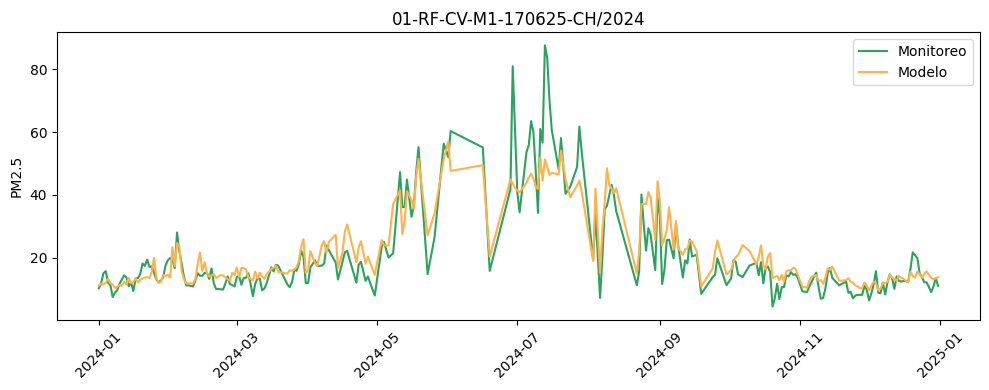

In [ ]:
#Plot para ver tendencias entre mediciones y predicciones para el año 2024
plt.figure(figsize=(10, 4))

plt.plot(df_diario["date"], df_diario["mean_medicion"],
         label="Monitoreo", color="#2ca25f")

plt.plot(df_diario["date"], df_diario["mean_prediccion"],
         label="Modelo", color="#feb24c")

plt.ylabel("PM2.5")
plt.title(modelo)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
